In [13]:
import pandas as pd

df = pd.read_csv("C:/quant/data/tardis_data/datasets/binance-futures_book_snapshot_25_2025-04-22_BTCUSDT.csv.gz")

In [14]:
print(df)

                exchange   symbol         timestamp   local_timestamp  \
0        binance-futures  BTCUSDT  1745280000323000  1745280001004374   
1        binance-futures  BTCUSDT  1745280003811000  1745280003812872   
2        binance-futures  BTCUSDT  1745280004767000  1745280004769784   
3        binance-futures  BTCUSDT  1745280004818000  1745280004820454   
4        binance-futures  BTCUSDT  1745280004869000  1745280004872592   
...                  ...      ...               ...               ...   
1553128  binance-futures  BTCUSDT  1745366399727000  1745366399729447   
1553129  binance-futures  BTCUSDT  1745366399779000  1745366399780661   
1553130  binance-futures  BTCUSDT  1745366399831000  1745366399833969   
1553131  binance-futures  BTCUSDT  1745366399935000  1745366399936888   
1553132  binance-futures  BTCUSDT  1745366399987000  1745366399989709   

         asks[0].price  asks[0].amount  bids[0].price  bids[0].amount  \
0              87466.1          16.830        8746

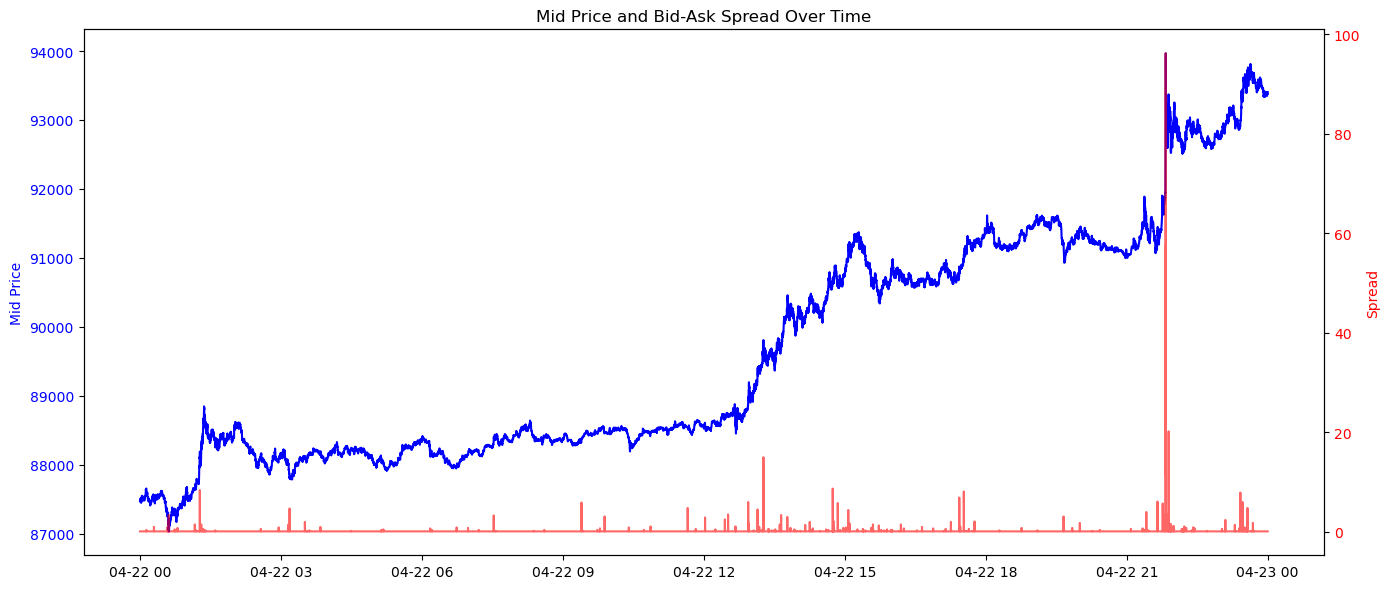

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Mid price and spread
df["mid_price"] = (df["asks[0].price"] + df["bids[0].price"]) / 2
df["spread"] = df["asks[0].price"] - df["bids[0].price"]

# Downsample for better visualization
df_plot = df.iloc[::100].copy()

# Convert timestamp to datetime
df_plot["datetime"] = pd.to_datetime(df_plot["timestamp"] // 1000, unit="ms")

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Mid price (left y-axis)
ax1.plot(df_plot["datetime"], df_plot["mid_price"], color='blue', label="Mid Price")
ax1.set_ylabel("Mid Price", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Spread (right y-axis)
ax2 = ax1.twinx()
ax2.plot(df_plot["datetime"], df_plot["spread"], color='red', alpha=0.6, label="Spread")
ax2.set_ylabel("Spread", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title("Mid Price and Bid-Ask Spread Over Time")
fig.tight_layout()
plt.show()
